In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from pandas_datareader import data as pdr
import yfinance as yf


In [3]:
sectortypes_df = pd.read_csv("Ticker_simple_info.csv")
sectortypes_df.head()
tickergroup = sectortypes_df.groupby(sectortypes_df["Company Type"])
tickergroup.count()

,Unnamed: 0,Ticker,Company Name
Company Type,,,
Consumer Discretionary,82,82,82
Consumer Staples,34,34,34
Energy,31,31,31
Financials,69,69,69
Health Care,61,61,61
Industrials,67,67,67
Information Technology,72,72,72
Materials,25,25,25
Real Estate,33,33,33


In [4]:

condis_df =  sectortypes_df["Ticker"].loc[sectortypes_df['Company Type'] == 'Consumer Discretionary'] 
condis_df
consta_df =  sectortypes_df["Ticker"].loc[sectortypes_df['Company Type'] == 'Consumer Staples'] 
consta_df
Energy_df =  sectortypes_df["Ticker"].loc[sectortypes_df['Company Type'] == 'Energy'] 
Energy_df
Financials_df =  sectortypes_df["Ticker"].loc[sectortypes_df['Company Type'] == 'Financials'] 
Financials_df
Healthcare_df =  sectortypes_df["Ticker"].loc[sectortypes_df['Company Type'] == 'Health Care'] 
Healthcare_df
Industrial_df = sectortypes_df["Ticker"].loc[sectortypes_df['Company Type'] == 'Industrials'] 
Industrial_df

It_df =  sectortypes_df["Ticker"].loc[sectortypes_df['Company Type'] == 'Information Technology'] 
It_df
Materials_df =  sectortypes_df["Ticker"].loc[sectortypes_df['Company Type'] == 'Materials'] 
Materials_df

Materials_df =  sectortypes_df["Ticker"].loc[sectortypes_df['Company Type'] == 'Materials'] 
Materials_df
Realestate_df =  sectortypes_df["Ticker"].loc[sectortypes_df['Company Type'] == 'Real Estate'] 
Realestate_df
Telecom_df =  sectortypes_df["Ticker"].loc[sectortypes_df['Company Type'] == 'Telecommunication Services'] 
Telecom_df
Utilities_df =  sectortypes_df["Ticker"].loc[sectortypes_df['Company Type'] == 'Utilities'] 
Utilities_df



10     AES
25     LNT
31     AEE
33     AEP
37     AWK
99     CNP
118    CMS
127     ED
152      D
156    DTE
157    DUK
165    EIX
169    ETR
179     ES
180    EXC
193     FE
334    NEE
337     NI
344    NRG
363    PCG
366    PNW
371    PPL
378    PEG
405    SCG
409    SRE
415     SO
484    WEC
496    XEL
Name: Ticker, dtype: object

In [13]:
# This variable is used for YTD performance.
end_of_last_year = datetime.datetime(2017, 12, 29)

In [5]:

stocks_start = datetime.datetime(2014, 1, 1)
stocks_end = datetime.datetime(2019, 9, 14)


In [6]:

yf.pdr_override() # <== that's all it takes :-)
sp500 = pdr.get_data_yahoo('^GSPC', 
                           stocks_start,
                             stocks_end)
    
sp500.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,1845.86,1845.86,1827.74,1831.98,1831.98,3080600000
2014-01-03,1833.21,1838.24,1829.13,1831.37,1831.37,2774270000
2014-01-06,1832.31,1837.16,1823.73,1826.77,1826.77,3294850000
2014-01-07,1828.71,1840.10,1828.71,1837.88,1837.88,3511750000
2014-01-08,1837.90,1840.02,1831.40,1837.49,1837.49,3652140000


In [7]:
tickers = Utilities_df.tolist()
tickers
# Stock comparison code
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map(data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))
               
all_data = get(tickers, stocks_start, stocks_end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*******************

In [19]:
all_data.tail()

Open   High    Low  Close  Adj Close   Volume
Ticker Date                                                      
XEL    2019-09-09  64.66  64.71  63.31  63.39      62.98  4850400
       2019-09-10  63.16  63.41  62.19  62.99      62.59  4748500
       2019-09-11  62.95  63.73  62.48  63.25      62.85  3423000
       2019-09-12  63.42  63.85  62.71  63.07      63.07  3588300
       2019-09-13  62.90  63.29  62.52  62.61      62.61  2823500

In [12]:
close_px =all_data[['Adj Close']].reset_index()
close_px.head(100)


,Ticker,Date,Adj Close
0,AES,2014-01-02,11.61
1,AES,2014-01-03,11.56
2,AES,2014-01-06,11.67
3,AES,2014-01-07,11.87
4,AES,2014-01-08,11.64
5,AES,2014-01-09,11.77
6,AES,2014-01-10,11.82
7,AES,2014-01-13,11.60
8,AES,2014-01-14,11.75
9,AES,2014-01-15,11.64


In [16]:
# This variable is used for YTD performance.
end_of_last_year = datetime.datetime(2018, 12, 31)
# Grabbing the ticker close from the end of last year
adj_close_start = close_px[close_px['Date']==end_of_last_year]
adj_close_start

,Ticker,Date,Adj Close
1257,AES,2018-12-31,14.11
2692,LNT,2018-12-31,41.29
4127,AEE,2018-12-31,63.99
5562,AEP,2018-12-31,72.97
6997,AWK,2018-12-31,89.53
8432,CNP,2018-12-31,27.42
9867,CMS,2018-12-31,48.62
11302,ED,2018-12-31,74.46
12737,D,2018-12-31,68.93
14172,DTE,2018-12-31,107.86


In [21]:
# Grab the latest stock close price
last_stocks_end = datetime.datetime(2019, 9, 13)
adj_close_latest = close_px[close_px['Date']==last_stocks_end]
adj_close_latest
adj_close_latest.set_index('Ticker', inplace=True)
adj_close_latest

,Date,Adj Close
Ticker,,
AES,2019-09-13,15.79
LNT,2019-09-13,51.65
AEE,2019-09-13,76.60
AEP,2019-09-13,91.54
AWK,2019-09-13,121.22
CNP,2019-09-13,29.85
CMS,2019-09-13,61.27
ED,2019-09-13,89.81
D,2019-09-13,78.52


In [22]:
merge_table = pd.merge(adj_close_start, adj_close_latest, on="Ticker")
merge_table

,Ticker,Date_x,Adj Close_x,Date_y,Adj Close_y
0,AES,2018-12-31,14.11,2019-09-13,15.79
1,LNT,2018-12-31,41.29,2019-09-13,51.65
2,AEE,2018-12-31,63.99,2019-09-13,76.60
3,AEP,2018-12-31,72.97,2019-09-13,91.54
4,AWK,2018-12-31,89.53,2019-09-13,121.22
5,CNP,2018-12-31,27.42,2019-09-13,29.85
6,CMS,2018-12-31,48.62,2019-09-13,61.27
7,ED,2018-12-31,74.46,2019-09-13,89.81
8,D,2018-12-31,68.93,2019-09-13,78.52
9,DTE,2018-12-31,107.86,2019-09-13,128.43


In [24]:
merge_table = merge_table.rename(columns={"Date_x": "End of Last Year",
                                        "Adj Close_x": "Adj Close End of Last Year",
                                        "Date_y": "Most Recent Date ",
                                        "Adj Close_y": "Adj Close Most Recent"
                                        })
merge_table.head()

,Ticker,End of Last Year,Adj Close End of Last Year,Most Recent Date,Adj Close Most Recent
0,AES,2018-12-31,14.11,2019-09-13,15.79
1,LNT,2018-12-31,41.29,2019-09-13,51.65
2,AEE,2018-12-31,63.99,2019-09-13,76.60
3,AEP,2018-12-31,72.97,2019-09-13,91.54
4,AWK,2018-12-31,89.53,2019-09-13,121.22


In [26]:
merge_table['ticker return'] = merge_table['Adj Close Most Recent'] / merge_table['Adj Close End of Last Year'] - 1
merge_table

,Ticker,End of Last Year,Adj Close End of Last Year,Most Recent Date,Adj Close Most Recent,ticker return
0,AES,2018-12-31,14.11,2019-09-13,15.79,0.119064
1,LNT,2018-12-31,41.29,2019-09-13,51.65,0.250908
2,AEE,2018-12-31,63.99,2019-09-13,76.60,0.197062
3,AEP,2018-12-31,72.97,2019-09-13,91.54,0.254488
4,AWK,2018-12-31,89.53,2019-09-13,121.22,0.353960
5,CNP,2018-12-31,27.42,2019-09-13,29.85,0.088621
6,CMS,2018-12-31,48.62,2019-09-13,61.27,0.260181
7,ED,2018-12-31,74.46,2019-09-13,89.81,0.206151
8,D,2018-12-31,68.93,2019-09-13,78.52,0.139127
9,DTE,2018-12-31,107.86,2019-09-13,128.43,0.190710


In [32]:
start = datetime.datetime(2018, 12, 31)
end = datetime.datetime(2019, 9, 14)

In [33]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=start,end=end)['Adj Close']

TypeError: download() got multiple values for argument 'start'

In [ ]:


start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 9, 14)

tick = "AAPL"

df = web.DataReader(tick, 'yahoo', start, end)
df.tail()


Exception in thread Thread-35:
Traceback (most recent call last):
  File "C:\Users\mghan\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\Users\mghan\Anaconda3\lib\threading.py", line 865, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\mghan\Anaconda3\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "C:\Users\mghan\Anaconda3\lib\site-packages\yfinance\__init__.py", line 537, in _download_one_threaded
    period, interval, prepost, proxy, rounding)
  File "C:\Users\mghan\Anaconda3\lib\site-packages\yfinance\__init__.py", line 550, in _download_one
    proxy=proxy, rounding=rounding)
  File "C:\Users\mghan\Anaconda3\lib\site-packages\yfinance\__init__.py", line 313, in history
    _time.strptime(str(start), '%Y-%m-%d')))
  File "C:\Users\mghan\Anaconda3\lib\_strptime.py", line 571, in _strptime_time
    tt = _strptime(data_string, format)[0]
  File "C:\Users\mghan\A

In [ ]:
# Rolling mean
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg
totalvolume =df['Volume']
totalvolume

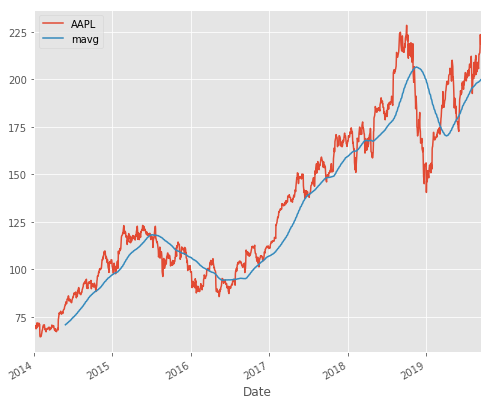

In [42]:
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
#totalvolume.plot(kind ='bar')
plt.legend()


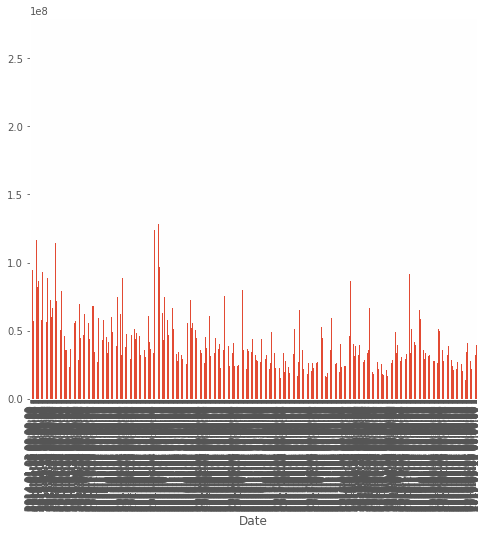

In [43]:
totalvolume.plot(kind ='bar')

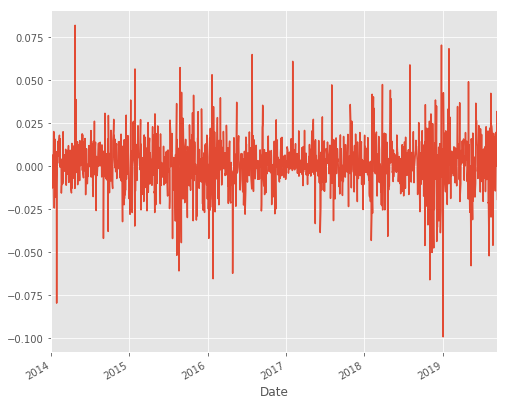

In [44]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [12]:
dfcomp = web.DataReader(['AAPL', 'GE', 'GOOG', 'IBM', 'MSFT'],'yahoo',start=stocks_start,end=stocks_end)['Adj Close']
dfcomp

TypeError: download() got multiple values for argument 'start'

In [45]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr
retscomp.AAPL

Date
2014-01-02         NaN
2014-01-03   -0.021966
2014-01-06    0.005453
2014-01-07   -0.007152
2014-01-08    0.006333
2014-01-09   -0.012770
2014-01-10   -0.006673
2014-01-13    0.005235
2014-01-14    0.019898
2014-01-15    0.020077
2014-01-16   -0.005580
2014-01-17   -0.024502
2014-01-21    0.015536
2014-01-22    0.004444
2014-01-23    0.008468
2014-01-24   -0.018178
2014-01-27    0.008113
2014-01-28   -0.079927
2014-01-29   -0.011352
2014-01-30   -0.001937
2014-01-31    0.001641
2014-02-03    0.001858
2014-02-04    0.014476
2014-02-05    0.007469
2014-02-06    0.005828
2014-02-07    0.013990
2014-02-10    0.017915
2014-02-11    0.013176
2014-02-12   -0.000075
2014-02-13    0.015879
                ...   
2019-08-02   -0.021158
2019-08-05   -0.052348
2019-08-06    0.018930
2019-08-07    0.010355
2019-08-08    0.022056
2019-08-09   -0.008240
2019-08-12   -0.002537
2019-08-13    0.042348
2019-08-14   -0.029765
2019-08-15   -0.004981
2019-08-16    0.023595
2019-08-19    0.018644
2019-0

Text(0, 0.5, 'Returns_GOOG')

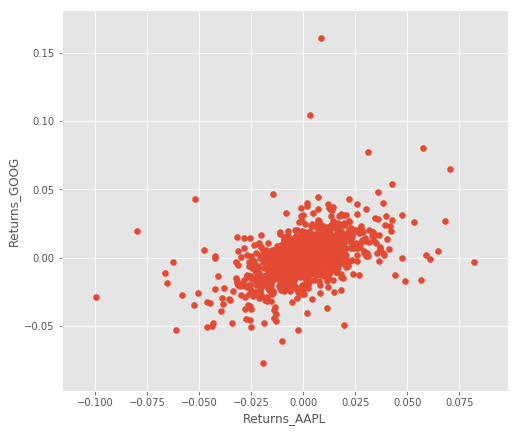

In [27]:
plt.scatter(retscomp.AAPL, retscomp.GOOG)
plt.xlabel("Returns_AAPL")
plt.ylabel("Returns_GOOG")

In [53]:
pd.scatter_matrix(retscomp, diagonal =‘kde’, figsize=(10, 10));

SyntaxError: invalid character in identifier (<ipython-input-53-d0f2566c9bb8>, line 1)

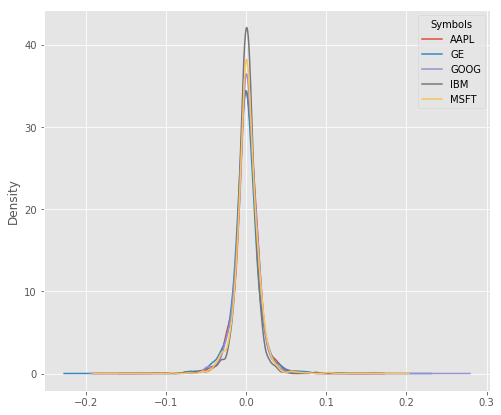

In [54]:
ax = retscomp.plot.kde()

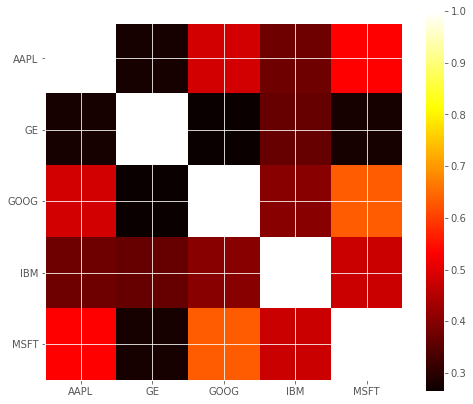

In [47]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

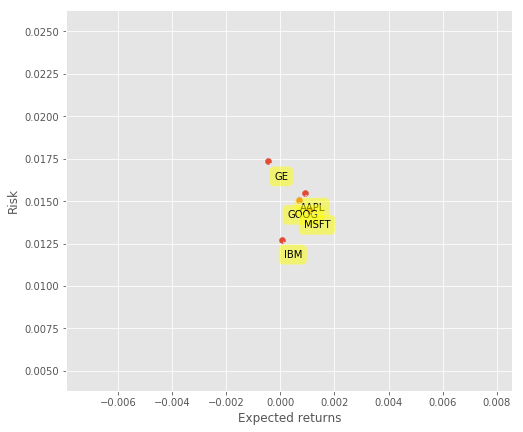

In [50]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))